# Analisis Regresi


## **KELOMPOK 3**

| NAMA                  | NIM          |
|-----------------------|-------------|
| M. Kemal Faza        | 24060124120013 |
| M. Dimas Arya Putra  | 24060124130062 |
| M. Akmal Fazli Riyadi | 24060124130123 |
| M. Yuda Tri Ananda   | 24060124110142 |
| M. Zaidaan Ardiansyah | 24060124140200 |


## 1. Import libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

## 2. Data Sampel: Pertumbuhan Penjualan

Kita menggunakan data penjualan hipotetis (dalam ribuan unit) selama 10 bulan.

In [15]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 2.9, 3.7, 4.4, 5.1, 5.9, 6.8, 7.4, 8.2, 9.0])

## 3. Regresi Linear

### Penjelasan:
Regresi linear memodelkan hubungan antara dua variabel dengan menyesuaikan garis lurus. Ini digunakan untuk menemukan hubungan linear antara variabel independen (x) dan variabel dependen (y). Model ini diasumsikan bahwa perubahan pada x akan menghasilkan perubahan proporsional pada y.

### Contoh Dunia Nyata:
Memprediksi pendapatan berdasarkan pengeluaran iklan. Dalam hal ini, kita mencoba menemukan bagaimana peningkatan pengeluaran iklan mempengaruhi pendapatan. Model ini dapat membantu bisnis dalam merencanakan anggaran iklan mereka untuk mencapai target pendapatan tertentu.

In [16]:
model = LinearRegression()
x_reshaped = x.reshape(-1, 1)
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

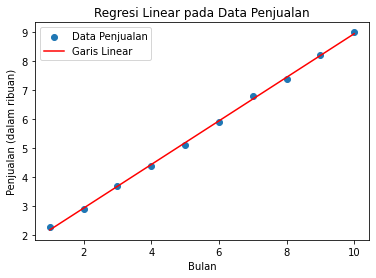

In [17]:
plt.scatter(x, y, label='Data Penjualan')
plt.plot(x, y_pred, color='red', label='Garis Linear')
plt.xlabel('Bulan')
plt.ylabel('Penjualan (dalam ribuan)')
plt.title('Regresi Linear pada Data Penjualan')
plt.legend()
plt.show()

## 4. Regresi Eksponensial

### Penjelasan:
Digunakan ketika pertumbuhan mengikuti pola eksponensial, seperti pertumbuhan populasi atau pertumbuhan virus. Regresi eksponensial cocok untuk data yang menunjukkan peningkatan atau penurunan yang cepat dan terus menerus. Model ini sering digunakan ketika laju perubahan proporsional terhadap nilai saat ini.

### Contoh Dunia Nyata:
Memodelkan penyebaran virus dari waktu ke waktu. Model ini membantu dalam memahami bagaimana virus menyebar dan memprediksi jumlah kasus di masa depan, yang penting untuk perencanaan kesehatan masyarakat.

In [18]:
def exp_model(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exp_model, x, y)
a, b = params

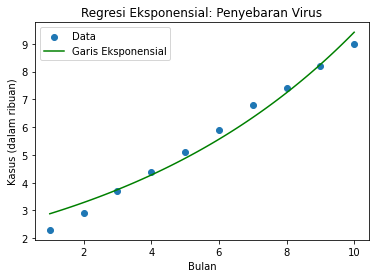

In [19]:
x_fine = np.linspace(min(x), max(x), 100)
y_exp_fit = exp_model(x_fine, a, b)
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_exp_fit, color='green', label='Garis Eksponensial')
plt.xlabel('Bulan')
plt.ylabel('Kasus (dalam ribuan)')
plt.title('Regresi Eksponensial: Penyebaran Virus')
plt.legend()
plt.show()

## 5. Regresi Fungsi Pangkat

### Penjelasan:
Memodelkan data yang mengikuti hubungan hukum pangkat. Regresi fungsi pangkat digunakan ketika satu variabel berubah secara proporsional terhadap pangkat variabel lain. Model ini sering ditemukan dalam ilmu fisika dan ekonomi untuk menggambarkan hubungan non-linear.

### Contoh Dunia Nyata:
Hubungan antara magnitudo dan frekuensi gempa bumi. Model ini membantu dalam memahami dan memprediksi frekuensi gempa bumi berdasarkan magnitudo, yang penting untuk perencanaan mitigasi bencana.

In [20]:
def power_model(x, C, b):
    return C * x ** b

params, _ = curve_fit(power_model, x, y)
C, b = params

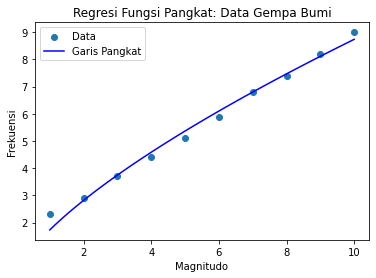

In [21]:
y_power_fit = power_model(x_fine, C, b)
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_power_fit, color='blue', label='Garis Pangkat')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.title('Regresi Fungsi Pangkat: Data Gempa Bumi')
plt.legend()
plt.show()

## 6. Regresi Pertumbuhan Jenuh

### Penjelasan:
Memodelkan pertumbuhan yang melambat karena sumber daya terbatas. Regresi pertumbuhan jenuh cocok untuk data yang menunjukkan pertumbuhan awal yang cepat diikuti oleh perlambatan menuju batas atas. Model ini sering digunakan dalam demografi dan biologi untuk memodelkan populasi yang mencapai kapasitas dukung lingkungannya.

### Contoh Dunia Nyata:
Pertumbuhan populasi yang dibatasi oleh makanan dan ruang. Model ini membantu dalam memahami bagaimana populasi mencapai titik jenuh dan memprediksi pertumbuhan di masa depan dengan mempertimbangkan batasan sumber daya.

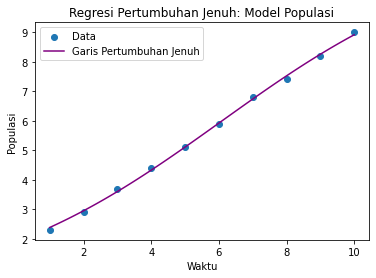

In [22]:
# Fungsi model pertumbuhan jenuh
def sat_growth(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Parameter fitting
params, _ = curve_fit(sat_growth, x, y, p0=[max(y), 1, np.median(x)])
a, b, c = params

# Membuat titik-titik x yang lebih halus untuk plot kurva
x_fine = np.linspace(min(x), max(x), 100)
y_sat_fit = sat_growth(x_fine, a, b, c)

# Plot data
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_sat_fit, color='purple', label='Garis Pertumbuhan Jenuh') # Perbaikan disini
plt.xlabel('Waktu')
plt.ylabel('Populasi')
plt.title('Regresi Pertumbuhan Jenuh: Model Populasi')
plt.legend()
plt.show()

## 7. Koefisien Model

In [23]:
print(f'Regresi Linear: Intercept = {model.intercept_}, Slope = {model.coef_[0]}')
print(f'Model Eksponensial: a = {a}, b = {b}')
print(f'Model Fungsi Pangkat: C = {C}, b = {b}')
print(f'Model Pertumbuhan Jenuh: a = {a}, b = {b}, c = {c}')

Regresi Linear: Intercept = 1.4399999999999995, Slope = 0.7509090909090911
Model Eksponensial: a = 11.931295215829925, b = 0.27452138453336
Model Fungsi Pangkat: C = 1.7295391393015018, b = 0.27452138453336
Model Pertumbuhan Jenuh: a = 11.931295215829925, b = 0.27452138453336, c = 6.054585211714388


## 8. Kesimpulan

- **Regresi Linear**: Terbaik untuk tren yang stabil, seperti prediksi pendapatan. Digunakan untuk menemukan hubungan linear antara variabel.
- **Regresi Eksponensial**: Ideal untuk pertumbuhan pesat, seperti penyebaran virus. Cocok untuk data yang menunjukkan peningkatan atau penurunan yang cepat dan terus menerus.
- **Regresi Fungsi Pangkat**: Cocok untuk fenomena yang mengikuti hubungan hukum pangkat, seperti gempa bumi. Memodelkan data yang mengikuti hubungan hukum pangkat.
- **Regresi Pertumbuhan Jenuh**: Digunakan ketika pertumbuhan melambat karena kendala, seperti pertumbuhan populasi. Cocok untuk data yang menunjukkan pertumbuhan awal yang cepat diikuti oleh perlambatan menuju batas atas.

Setiap metode berguna untuk jenis data yang berbeda dan harus dipilih berdasarkan sifat masalah yang dihadapi.